In [1]:
import os
from os import path

os.environ["DEBUG"] = "fonts"

In [5]:
import torch
from transformers import AutoTokenizer, TrOCRProcessor

model_pth = 'models/tang-syn-5.0-online-epoch-1'

tokenizer = AutoTokenizer.from_pretrained(model_pth)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [2]:
import random

import torch
from torch.utils.data import Subset

from lib.data_aug_v2 import build_data_aug
from lib.datasets import load_datasets, list_text_files, load_texts
from lib.tang_syn_config import preload_fonts, load_syn_config
from train import load_training_config


TRAINING_CONFIG = "deit-base-macbert-bicubic"
SYN_CONFIG = "tang_syn_config-64"
MAX_LENGTH = 64


# Load fonts
training_config = load_training_config(
    TRAINING_CONFIG,
    syn_config_name=SYN_CONFIG)

syn_config = training_config.get("syn_config")

fonts = preload_fonts(syn_config)

# Load texts
text_files = list_text_files()
texts = load_texts(text_files)

# Load datasets
train_dataset, eval_datasets = load_datasets(
    processor, tokenizer, fonts=fonts, texts=texts, training_config=training_config, debug=True)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
Fallback font cmaps loaded.
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame commu

25 extra bytes in post.stringData array
165399 extra bytes in post.stringData array
158369 extra bytes in post.stringData array
201846 extra bytes in post.stringData array


All font cmaps loaded: 1589


100%|██████████| 3/3 [00:00<00:00, 131.67it/s]


Loading text files...


100%|██████████| 3879/3879 [00:06<00:00, 604.92it/s]


3879 text files loaded.
Initializing training dataset.
Initializing eval datasets.


100%|██████████| 1/1 [00:00<00:00, 644.19it/s]

Number of training examples: 72000000
Number of validation examples: 500 15


交阯参政治理有方后兵败被杀
HTML 5和XHTML 1.x的差异.
士表示对此感愕然曾出征2016年里约
府机构控制昆津病毒栖息地要采取措施减少蚊子繁殖的水域喷
晚上7时30
在每集第一段播出赵树海与在该集中出现的全部演员及来宾来一段脱口秀及介绍该集各
单西蒙》（"Simple Simon"）是一首流行
后鲁西永省成为法国的一部分该城丧失了军事意义该城的防御工事被废
开支559亿美元(第5)占GDP2.5
父：新导命（声：立木文彦）／母：新导时美（声：进藤尚美）／姑姑：新导未来


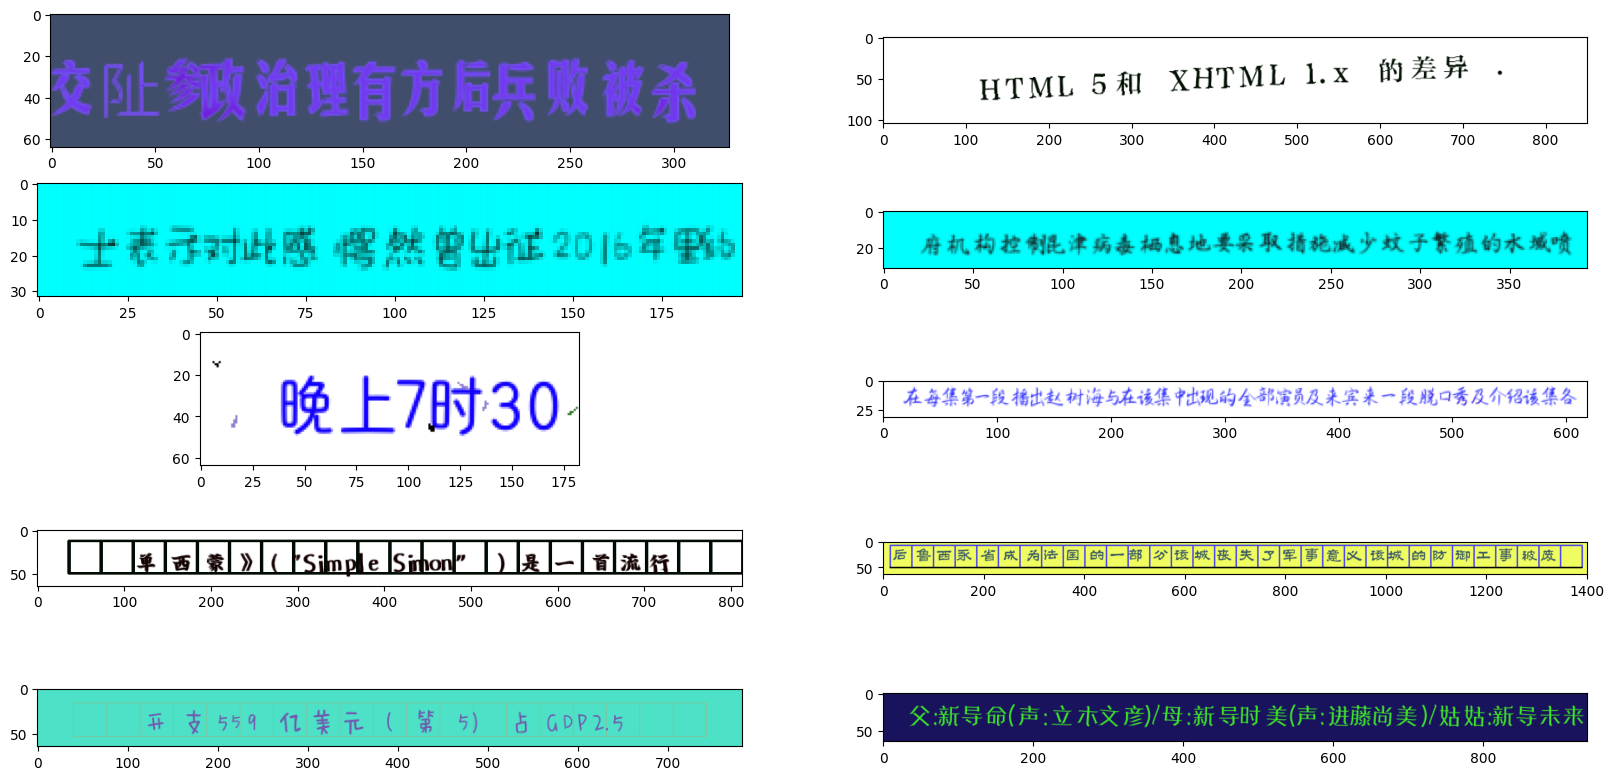

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Set the figure size

length = len(train_dataset)

for i in range(10):

    random_index = random.randint(0, length - 1)
    res = train_dataset[random_index]

    plt.subplot(5, 2, i + 1)  # Create a subplot for each image
    plt.imshow(res[0])  # Display the image

    print(res[1])

plt.show()

In [11]:
tokenizer.pad_token_id

0

In [8]:
torch.Tensor(tokenizer("Love",
                       padding="max_length",
                       truncation=True,
                       max_length=64,
                       ).input_ids)

tensor([ 101., 8451.,  102.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.])

In [10]:
tokenizer("Love",
          padding="max_length",
          truncation=True,
          max_length=64,
          return_tensors="pt")

{'input_ids': tensor([[ 101, 8451,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [6]:
processor(res[0], return_tensors="pt").pixel_values.squeeze().dtype

torch.float32

In [7]:
from tqdm import tqdm

for i in tqdm(range(1000)):
    random_index = random.randint(0, length - 1)
    res = train_dataset[random_index]

100%|██████████| 1000/1000 [00:10<00:00, 93.62it/s]
